In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Al iniciar nuestro código importamos la librería pyplotlib desde matplotlib, importamos pandas, seaborn y numpy.

La base de datos utilizada es la de Child Smokers, el objetivo de su análisis es para identificar la posibilidad que se tiene de tener una función pulmonar reducida de los niños y se compara a aquellos que fuman a los que no.

In [2]:
data = pd.read_csv('Child smokers.csv', na_values = ':')
data

,Age (years),Height (cm),FEV (litres),Sex,Smoker
0,9,145,1.708,female,non
1,8,171,1.724,female,non
2,7,138,1.720,female,non
3,9,135,1.558,male,non
4,9,145,1.895,male,non
...,...,...,...,...,...
649,15,152,2.278,female,smoker
650,16,183,4.872,male,smoker
651,16,170,4.270,male,smoker
652,15,173,3.727,male,smoker


Usamos la función pd.read_csv() para leer nuestros datos y lo asignamos a una variable, en este caso la variable data.

Los datos en el archivo estan completos; es decir, no había datos incorrectos o inexistentes. Las variables incluidas son Age (years), la cual representa la edad de la persona, Height (cm), la cual es la altura, FEV (litres), el cual es el volumen espiratorio forzado en litros, Sex, indica si es mujer u hombre el individuo en cuestión y Smoker, la cual indica si la persona fuma o no.

In [3]:
data.describe()

,Age (years),Height (cm),FEV (litres)
count,654.000000,654.000000,654.000000
mean,9.931193,155.298165,2.636780
std,2.953935,14.471647,0.867059
min,3.000000,117.000000,0.791000
25%,8.000000,145.000000,1.981000
50%,10.000000,156.000000,2.547500
75%,12.000000,166.000000,3.118500
max,19.000000,188.000000,5.793000


Usamos la función .describe() y esta nos imprime una tabla con distintos datos sobre nuestra información. Los datos que nos da son la media, la desviación estándar, el mínimo, y el máximo para nuestras variables numéricas Age, Height y FEV.

Los promedios son de 9.93, 155.29 y 2.63 respectivamente. La desviación estándar es de 2.95, 14.47 y 0.86 respectivamente. Esto nos dice que el valor de la edad se aleja poco del promedio ya que tenemos un rango de edades de 3 a 19. La desviación estándar de la altura si varía mucho ya que el rango es muy grande y para el FEV, tenemos un valor cerca de lo esperado. Para conseguir la mediana usamos .median() y esto nos da 10, 156 y 2.63 respectivamente. 

In [4]:
data.dtypes

Age (years)       int64
Height (cm)       int64
FEV (litres)    float64
Sex              object
Smoker           object
dtype: object

Con la función .dtypes podemos ver que tipo de dato es cada columna del archivo csv. Esto es importante para saber cómo manipularemos los datos.

In [7]:
print("El rango de Age es de",data['Age (years)'].min()," a",data['Age (years)'].max())
print("El rango de Height es de",data['Height (cm)'].min()," a",data['Height (cm)'].max())
print("El rango de FEV es de",data['FEV (litres)'].min()," a",data['FEV (litres)'].max())

El rango de Age es de 3  a 19
El rango de Height es de 117  a 188
El rango de FEV es de 0.7909999999999999  a 5.792999999999999


En esta seccion utilizamos las funciones de .min() y .max() en las columnas Age (years), Height (cm) y FEV (litres) para poder identificara la minima y maxima de cada una y asi identificar el rango de datos que maneja cada uno de estos datos. La razon por la cual excluimos Sex y Smocker es por que sus datos no son de tipo numerico y no nos aportaria mucha informacion.

In [5]:
data['Age (years)'].median()

10.0

In [6]:
data['Height (cm)'].median()

156.0

In [7]:
data['FEV (litres)'].median()

2.5475

Usamos la función .median() para conseguir la mediana de nuestras variables. La escribimos como data['Age (years)'].median() para obtener la mediana de la variable Age (years). Hacemos lo mismo para Heigth (cm) y FEV (litres).



In [8]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Smoker'] = data['Smoker'].astype('category').cat.codes

data = pd.DataFrame(data)
data

,Age (years),Height (cm),FEV (litres),Sex,Smoker
0,9,145,1.708,0,0
1,8,171,1.724,0,0
2,7,138,1.720,0,0
3,9,135,1.558,1,0
4,9,145,1.895,1,0
...,...,...,...,...,...
649,15,152,2.278,0,1
650,16,183,4.872,1,1
651,16,170,4.270,1,1
652,15,173,3.727,1,1


Lo siguiente que haremos es transformar nuestra variable data a un data frame. Para esto convertimos las variables Sex y Smoker a ‘category’ ya que estas eran tipo object. Usamos la función .astype(‘category’).cat.codes en ambas variables y usamos pd.DataFrame(data) para tener nuestro data frame. 

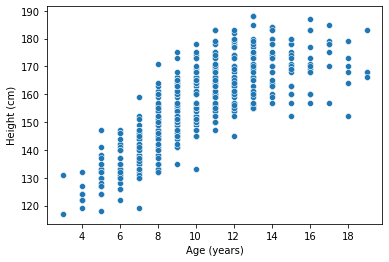

In [9]:
ax = sns.scatterplot(x = "Age (years)", y = "Height (cm)", data = data,ci=False)

Después, se realizan diagramas de dispersión usando la función  scatterplot  de la librería seaborn. Primero se tiene el diagrama de Age (years) contra Height (cm). Esta gráfica muestra que existe una correlación positiva entre estas variables, ambas aumentan simultáneamente. No obstante, cuando se llega a la edad de 15 se comienza a notar un cambio en la correlación a una negativa, donde la edad aumenta y la altura disminuye.

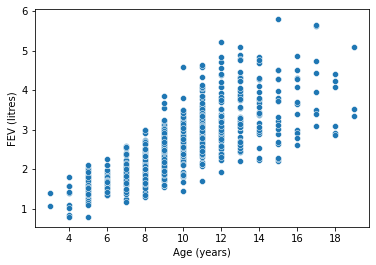

In [10]:
ax = sns.scatterplot(x = "Age (years)", y = "FEV (litres)", data = data,ci=False)

Se realiza un diagrama de dispersión de las variables Age (years) y FEV (litres) usando la función  scatterplot  de la librería seaborn. Se puede observar una correlación positiva, donde a medida que aumenta la edad, el FEV también lo hace.

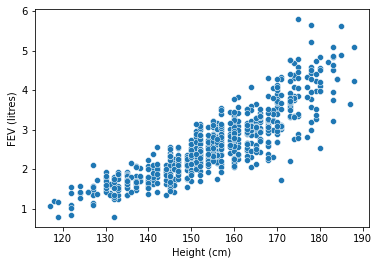

In [11]:
ax = sns.scatterplot(x = "Height (cm)", y = "FEV (litres)", data = data,ci=False)

Se realiza un diagrama de dispersión de las variables Height (cm) y FEV (litres) usando la función  scatterplot  de la librería seaborn. Se aprecia que hay una muy clara correlación positiva, lo cual significa que mientras aumenta la altura, el FEV también aumenta.

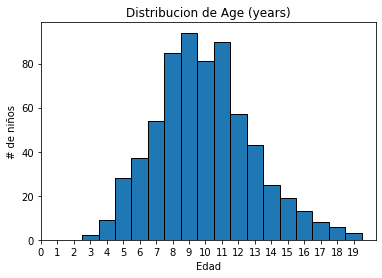

In [12]:
from collections import Counter
valores = data["Age (years)"]
histogram = Counter(min(valor//1*1,20)for valor in valores)
plt.bar([x for x in histogram.keys()],histogram.values(),1,edgecolor = (0,0,0))
plt.xticks([i for i in range(20)])
plt.xlabel("Edad")
plt.ylabel("# de niños")
plt.title("Distribucion de Age (years)")
plt.show()

Ahora, de la Collections se importa Counter para realizar histogramas, esta cuenta la cantidad de apariciones de un dato, con  .bar es posible hacer las gráfica e indica detalles de esta, .xticks, .xlabel, .ylabel, .title establecen el formato. Finalmente, .show muestra el histograma. 

En el histograma de la variable Age (years) se nota un comportamiento de una distribución casi normal. Se tiene una cantidad pequeña de menores de 8 años, las personas de edades de 8 a 12 años componen la mayor parte de la muestra y de los 13 a 19 años se tiene cada vez una cantidad no tan elevada como la anterior. Esta es una variable discreta.

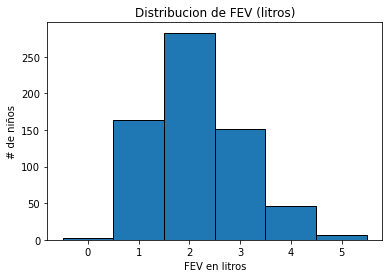

In [13]:
valores = data["FEV (litres)"]
histogram = Counter(min(valor//1*1,6)for valor in valores)
plt.bar([x for x in histogram.keys()],histogram.values(),1,edgecolor = (0,0,0))
plt.xticks([i for i in range(6)])
plt.xlabel("FEV en litros")
plt.ylabel("# de niños")
plt.title("Distribucion de FEV (litros)")
plt.show()

En el histograma de la variable FEV(litres) se nota un comportamiento de una distribución casi normal. Primero se tienen pocos niños con FEV con un valor menor a dos, posteriormente, se tiene la mayor cantidad de niños con FEV de 2 litros a casi 3 litros, después, se tiene una menor cantidad de niños con FEV de 3 litros en adelante.

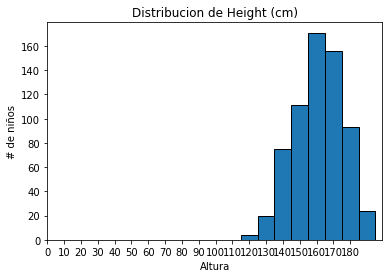

In [14]:
valores = data["Height (cm)"]
histogram = Counter(min(valor//10*10,190)for valor in valores)
plt.bar([x+10 for x in histogram.keys()],histogram.values(),10,edgecolor = (0,0,0))
plt.xticks([i*10 for i in range(19)])
plt.xlabel("Altura")
plt.ylabel("# de niños")
plt.title("Distribucion de Height (cm)")
plt.show()

En el histograma de la variable height se tiene una muestra con una altura superior a los 110 cm. Primero, se observa una cantidad moderada de niños con una altura menor a 160 cm. Después, se aprecia una gran cantidad de individuos con una altura de 160 cm a 170 cm. Luego, se tiene cada vez una cantidad menor que la anterior de niños con  una altura mayor de 170 cm.

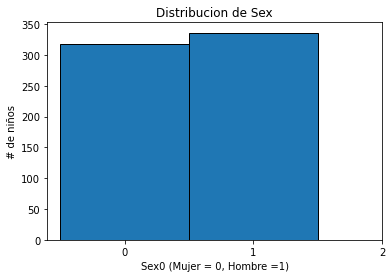

In [15]:
valores = data["Sex"]
histogram = Counter(min(valor//1*1,3)for valor in valores)
plt.bar([x for x in histogram.keys()],histogram.values(),1,edgecolor = (0,0,0))
plt.xticks([i for i in range(3)])
plt.xlabel("Sex0 (Mujer = 0, Hombre =1)")
plt.ylabel("# de niños")
plt.title("Distribucion de Sex")
plt.show()

En el histograma de la variable sex observamos que la mayoría de los niños son de sexo masculino, siendo ligeramente menor la cantidad de sexo femenino.

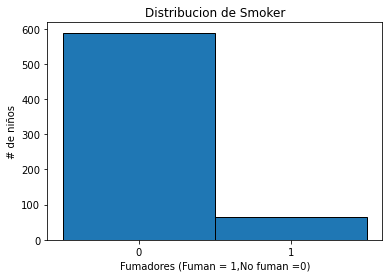

In [18]:
valores = data["Smoker"]
histogram = Counter(min(valor//1*1,2)for valor in valores)
plt.bar([x for x in histogram.keys()],histogram.values(),1,edgecolor = (0,0,0))
plt.xticks([i for i in range(2)])
plt.xlabel("Fumadores (Fuman = 1,No fuman =0)")
plt.ylabel("# de niños")
plt.title("Distribucion de Smoker")
plt.show()((

En el último histograma observamos datos de la variable smoker, se observa que la gran mayoría de los niños en la base de datos no fuman, siendo muy pocos niños los que fuman.

In [19]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
data1 = data
data2 = min_max.fit_transform(data1.values)
dataf = pd.DataFrame(data2, columns=data1.columns)
dataf

,Age (years),Height (cm),FEV (litres),Sex,Smoker
0,0.3750,0.394366,0.183327,0.0,0.0
1,0.3125,0.760563,0.186525,0.0,0.0
2,0.2500,0.295775,0.185726,0.0,0.0
3,0.3750,0.253521,0.153339,1.0,0.0
4,0.3750,0.394366,0.220712,1.0,0.0
...,...,...,...,...,...
649,0.7500,0.492958,0.297281,0.0,1.0
650,0.8125,0.929577,0.815874,1.0,1.0
651,0.8125,0.746479,0.695522,1.0,1.0
652,0.7500,0.788732,0.586965,1.0,1.0


Antes de graficar los datos, normalizamos nuestros datos entre valores de 0 a 1 con la función MinMaxScaler() de la librería de sklearn.preprocessing. Con esta función logramos crear una base de dato que tome el valor más grande de cada variable y lo convierte a uno y el más chico a cero, y todos los valores de por medio los iguala para que tenga su valor correspondiente entre estos parámetros.

<AxesSubplot:>

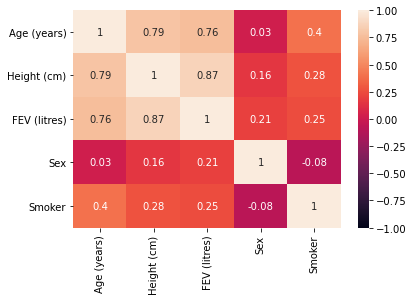

In [20]:
correlation_matrix = dataf.corr().round(2)
sns.heatmap(data=correlation_matrix, vmin = -1,annot=True)

Se utiliza el marco de datos con los valores normalizados para así con la función .corr realizar la matriz para hacer el heatmap, este se hace con la función .heatmap de librería seaborn. Los valores mostrados en el mapa de calor van del -1 al 1, donde mientras más cercanos estén al -1, se tiene una correlación negativa y, mientras más cerca se esté del 1, se tendrá una correlación positiva. En este caso se aprecia que la variable que se relaciona más con FEV es la Height (cm). Es decir, hay una correlación positiva, y mientras la altura aumente, FEV también lo hará. La edad, Age (years) también tiene una correlación positiva, y de igual forma mientras más aumenta esta, más lo hará FEV. En cambio, las varibles Sex y Smoker tienen una correlación positiva pero no tanto como las anteriores, lo cual significa que si la persona es hombre (ya que 1 significa sexo masxulino) mayor será su FEV. En el caso de Smoker, si se fuma (ya que 1 significa que la persona es fumadora), mayor será el FEV.  Curiosamente, lo encontrado es lo contrario a lo que se esperaría pero los datos del estudio avalan tal información.

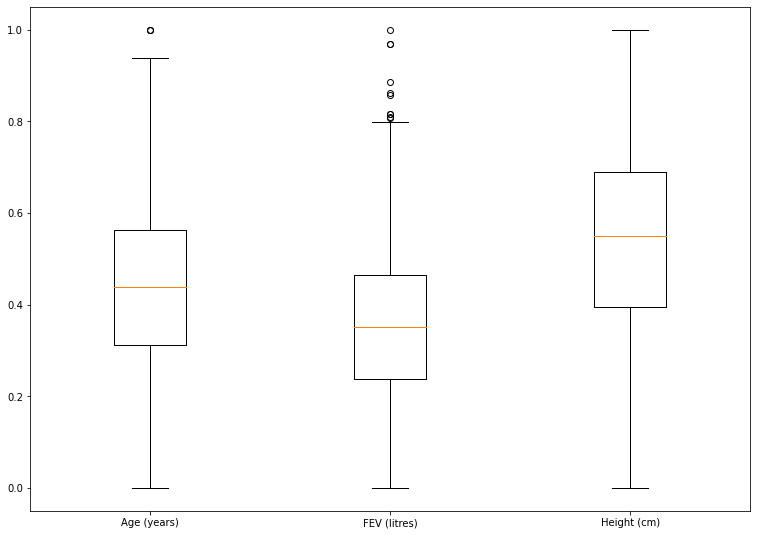

In [21]:
datos = [dataf['Age (years)'],dataf['FEV (litres)'],dataf['Height (cm)']]
fig = plt.figure(figsize=(10,7))
ax=fig.add_axes([0,0,1,1])
bp= ax.boxplot(datos)
labels = ('Age (years)','FEV (litres)','Height (cm)')
plt.xticks(np.arange(len(labels))+1,labels)
plt.show()

A continuación, se realizan los boxplots para representar las variables numéricas, esto se hace con la función plt.figure para indicar el tamaño, .addaxes para indicar los axes y .boxplot para finalmente crear los boxplots con los datos normalizados de edad, FEV en litros y estatura. Se observa  que en la variable FEV se encuentran varios outliers que nos hablan de una gran cantidad de datos extremos, también podemos encontrar uno en la variable de edad mientras que en la de estatura no se encuentran datos fuera de lo estándar.

In [22]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3)
clu.fit(dataf)
clu.cluster_centers_

array([[3.97849462e-01, 4.84072896e-01, 3.17515288e-01, 1.11022302e-15,
        2.63677968e-16],
       [4.17943548e-01, 5.53066788e-01, 3.88520721e-01, 1.00000000e+00,
        2.77555756e-16],
       [6.57692308e-01, 7.11809317e-01, 4.96973518e-01, 4.00000000e-01,
        1.00000000e+00]])

Utilizamos nuestra nueva base de datos ya normalizada para pasarla por el algoritmo K-Means.

Optamos por usar un valor de tres para k, con nuestra base de datos no es posible identificar los clusters ya que k-means solo se usa con base de datos no etiquetadas y nuestra base de datos sí cuenta con categorías. Así que, elegimos la k considerando que, la base de datos de “Child Smokers” es analizada con el fin de identificar la posibilidad que se tiene de tener una función pulmonar reducida. Por lo que,  el valor de k a usar fue obtenido al identificar que una forma eficiente de organizar la información para obtener conclusiones relevantes era el tener tres grupos. Estos grupos consisten de aquellos quienes tienen un riesgo bajo, los que tienen un riesgo moderado y los que tienen un riesgo alto de tener una función pulmonar reducida.

Con base en los centros, se puede identificar que las variable Age (years), Height (cm) y Sex influyen en una muy alta medida en la diferenciación de los clusters ya que el valor de estas variables en cada vector dista mucho entre sí. Asimismo, la variable FEV (litres) influye en la separación de los clusters pero no en una tan alta medida como las variables anteriores ya que, pese a que los valores encontrados son diferentes de vector a vector, esta diferencia no es tan grande. Ahora bien, la variable Smoker, de igual forma, varía entre cada vector pero este cambio no es tan significativo como los anteriores. En el caso de k  = 3, dos de los vectores tienen un valor de Smoker muy similar, mientras que, el tercero no. Esto puede indicar que  tal vez los dos primeros clusters deberían ser uno solo; mas, cabe señalarse que, esto no fue indicado por el resto de las variables.